Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as any collaborators you worked with:

In [ ]:
%matplotlib inline
%precision 16
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Final Project

This notebook will provide a brief structure and rubric for presenting your final project. 

The purpose of the project is 2-fold
* To give you an opportunity to work on a problem you are truly interested in (as this is the best way to actually learn something)
* To demonstrate to me that you understand the overall workflow of problem solving from problem selection to implementation to discussion 

You can choose any subject area that interests you as long as there is a computational component to it.  However, please do not reuse projects or homeworks you have done in other classes.  This should be **your** original work.

**You can work in teams, but clearly identify each persons contribution** and every team member should hand in their own copy of the notebook.

### Structure
There are 5 parts for a total of 100 points that provide the overall structure of a mini research project.

* Problem Description
* Problem Justification
* Description of Computational components needed to address problem
* Implementation including tests
* Discussion of results and future directions

For grading purposes, please try to make this notebook entirely self contained. 

The project is worth about 2 problem sets and should be of comparable length or less (please: I will have about 100 of these to read and I am not expecting full 10 page papers).  The actual project does not necessarily have to work but in that case you should demonstrate that you understand why it did not work and what steps you would take next to fix it.

Have fun

## Problem Description [15 pts]

In 2-4 paragraphs, describe the general problem you want to solve and the goals you hope to achieve. You should provide any relevant background and references, particularly if you are reproducing results from a paper.  Please use proper spelling and grammar. 

In 2002, Billy Beane, Paul DePodesta, and the Oakland Athletics changed the landscape of baseball forever. As a small market team with financial issues looking to be contenders for a World Series championship, they could not turn to spending money to build a team that would take them all the way to glory. Instead, Billy and Paul turned to the wealth of data that baseball tracks from year to year to solve their issues and play "Moneyball". Using data from previous years, they were able to locate specific statistics that they thought would give their team the best opportunity to make the playoffs and win the most games. These features were part of their overall "model" to predict their current team's performance and make managerial moves to improve their team. This leads to the problem that I want to solve in this project.

For my final project of this Intro Numerical Methods course, I plan to work independently to explore and reproduce a machine learning algorithm that predicts the number of games that an MLB team will win over the course of a single season. Having found multiple projects done in the past on this topic, I would like to make an attempt to reproduce the results that one of these projects yielded, as well as take them a little further. I would do this by creating a two fully functioning Machine Learning models, one that can tested for its accuracy in predicting the number of games a given team will win in a certain year, and another to predict whether or not a given team will make the playoffs in a given year. The work leading up to these models will be based on the work done in the project linked below. This project had also been solving the general problem that I would like to explore.

https://www.kaggle.com/wduckett/beane-and-depodesta-s-regression-roadmap

I hope to gain experience working with machine learning algorithms as it is a topic that is relatively new to me, but I am very interested in and would like to further explore a career in. I also hope to gain valuable experience working on an independent project and understanding the overall workflow, as well as being able to accurately show my process. I feel like with my baseball background, I may be able to make this project my own and take the model even further or branch off and create a different model of my own interest. I think that it is also possible that this project is just the tip of the iceberg when it comes to its depth. I feel that there is plenty more that can be extended off the results of my project and more research that can be done to take the project to new levels.

## Problem Justification [5 pts] 

Briefly describe why this problem is important to you,  and, if possible, to anyone else.

This topic is important to me as I am a Columbia University baseball player with aspirations to use my baseball and programming experience to find a job in baseball one day. It hits very close to home. Not only will this project help me demonstrate my learning of skills from this course and project management overall, it allows me to utilize my background and love for the game of baseball to learn about a new topic that we did not get to explore in this class, but is important to learn thorughout my career as an Applied Mathematics major. This topic is also important to anyone that is working with data and statistics in the game of baseball. Although this project is only the tip of the iceberg, the topics that are covered and the extensions that can be made from a project like this can be extremely useful for anyone who is trying to optimize the performance of their team and get in edge in the world of baseball.

## Computational  Methods [10 pts]

Briefly describe the specific approach you will take to solve some concrete aspect of the general problem. 

You should  include all the numerical or computational methods you intend to use.  These can include methods or packages  we did not discuss in class but provide some reference to the method. You do not need to explain how the methods work, but you should briefly justify your choices. 

**If you need to install or import any additional python packages,  please provide complete installation instructions in the code block below**



I will be utilizing season data and statistics for each team from the years 1962 to 2001 to train my machine learning model and data from 2002-2012 to test the accuracy of my model and make predictions. This will allow me to compare my results to that of the project that I am trying to reproduce the results of. With this data, I will be following the exploratory data analysis and feature engineering to recreate the data used in the linear models and reproducing the models that were used by Billy and Paul. These linear models will allow me to predict the number of wins that the 2002 Oakland Athletics will win, which can then be compared to their actual win numbers. I will be using the **seaborn** package to reproduce the scatter plots and gain experience in another data visualization package. I will also be using several methods in the **sklearn** package, namely test_train_split, LinearRegression, and LogisticRegression. These will be used to split the dataset into randomized testing and training portions as well as to create the linear and logistic regression models. In order to create my own models, I will install and import the **xgboost** package in order to use the XGBRegression and XGBClassifier methods. Along with the MSE and accuracy_score methods from **sklearn**, I will be able to evaluate the models that I have created to predict the wins and playoff possibility of teams.

In [ ]:
# Provide complete installation or import information for external packages or modules here e.g.
#pip install somepackage

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error as MSE, accuracy_score
import seaborn as sb
!pip install xgboost
import xgboost as xgb

## Implementation [60 pts]

Use the Markdown and Code blocks below to implement and document your methods including figures.  Only the first code block will be a grading cell but please add (not copy) cells in this section to organize your work. 

Please make the description of your problem readable by interlacing clear explanatory text with code. 
All code should be well described and commented.

For at least one routine you code below, you should provide a test block (e.g. that implements `numpy.testing` routines) to validate your code.

We will begin by reading in the data that will be used throughout the project. This is included in the project folder for easy access. To aid in the understanding of the abbreviated column names, a list of the important columns and what they represent is provided below...
- RS: Total runs scored that season
- RA: Total runs allowed that season
- W: Total games won that season
- OBP: (On-Base Percentage) The rate at which a team reaches base
- SLG: (Slugging Percentage) The total number of bases a team records per at-bat
- BA: (Batting Average) The rate at which a team gets a hit
- OOBP: (Opponent's On-Base Percentage) The rate at which the team's opponents reach base
- OSLG: (Opponent's Slugging Percentage) The total number of bases a team's opponents record per at-bat

In [ ]:
baseball_df = pd.read_csv("baseball.csv")
baseball_df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


During the 2002 season, Paul Depodesta, assistant to the General Manager, Billy Beane, wanted to answer the question of how a team makes it to the playoffs. He predicted that if a team won 95 games or more, they were at or above the threshold of being almost certain to make the playoffs. Let's take a look at this...

First, we will subset the data to look at only the years that Billy and Paul had available to them at the time.

In [ ]:
EDA = baseball_df[baseball_df.Year < 2002]
EDA.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393


Let's look at each team, their total wins in a season, and classify each season by whether or not they made the playoffs. We will also draw a line at the 95 win threshold to see if this mark makes sense.

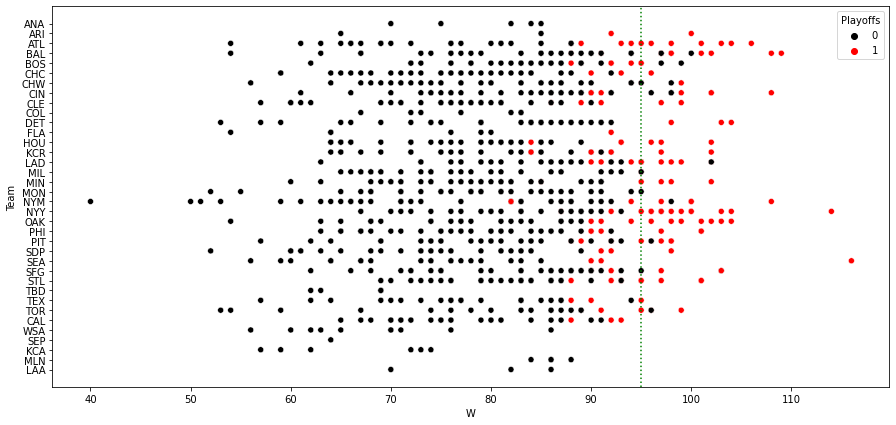

In [ ]:
plt.figure(figsize=(15,7))
playoff_plt = sb.scatterplot(x='W', y='Team', hue='Playoffs', palette=['black','red'], data = EDA)
plt.axvline(95, 0, color = 'g', linestyle = ':')
plt.show()

Notice how almost all of the points to the right of the line are red, which means that they made the playoffs. If the line were placed at 92 wins on the x-axis, there would still be too many black dots to the right of it to be sufficiently certain that the threshold was optimal. If the line were placed at 98 wins on the x-axis, there would be too many red dots to the left of the line. So, Beane and DePodesta had a number to shoot for in 95 wins throughout the regular season. Let's see if the relalationship between wins and making the playoffs is strong through a logistic regression model...

In [ ]:
X = np.array(EDA['W']).reshape(-1, 1) 
y = np.array(EDA['Playoffs']).reshape(-1, 1)

# Splitting the data into training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

reg = LogisticRegression() 
model = reg.fit(X_train, y_train)
print("The R^2 value of this model:", reg.score(X_test, y_test))
Playoffs = lambda wins: model.intercept_[0] + model.coef_[0][0] * wins
print("The Playoff classifier for a team with 95 wins is", round(Playoffs(95)))

The R^2 value of this model: 0.8784530386740331
The Playoff classifier for a team with 95 wins is 1


/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


With a high $R^2$ value for the logistic regression model and prediction for a 95 win team to make the playoffs, we have shown that there is some validity to the 95 win threshold.

During the 2002 season, Paul Depodesta also wanted to answer the question of how a team can win 95 or more games in a season. He reshaped his question to ask how many runs were needed to be scored in order to win 95 games or more in a single season. Since a team needs to score more runs than its opponent to win the game, looking at a teams run differential, or the difference between the number of runs they score and the number of runs they allow, should be a strong predictor of whether or not a team makes the playoffs. Let's do some feature engineering to show this...

In [ ]:
EDA['RD'] = EDA.apply(lambda row: row.RS - row.RA, axis=1)
EDA.head()

<ipython-input-7-b20bc49e0f95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EDA['RD'] = EDA.apply(lambda row: row.RS - row.RA, axis=1)


,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,27


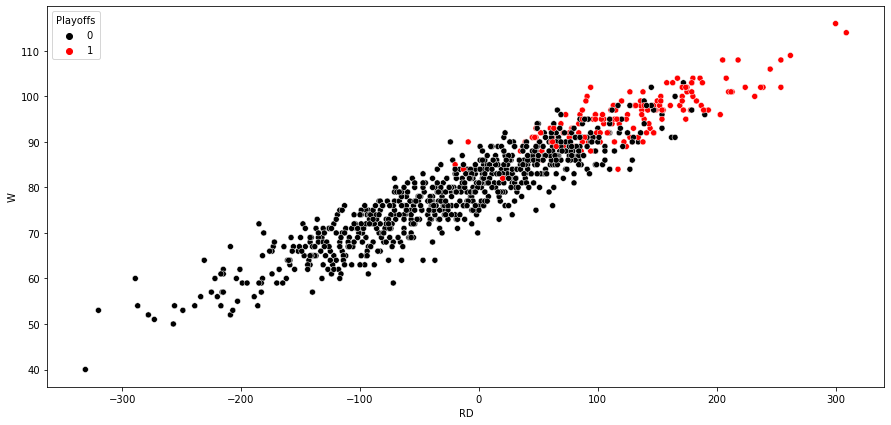

In [ ]:
plt.figure(figsize=(15,7))
RD_plt = sb.scatterplot(x='RD', y='W', hue='Playoffs', palette=['black','red'], data = EDA)
plt.show()

This plot shows a pretty linear relationship between the run differential of a team and the number of games they win throughout the season as a result. The more runs a team scores than its opponents, the more games the team tends to win. We can also see a point at which that run differential starts to become an indicator of making the playoffs. Let's see what that threshold is using our 95 win mark from the previous model...

In [ ]:
X = np.array(EDA['RD']).reshape(-1, 1) 
y = np.array(EDA['W']).reshape(-1, 1)

# Splitting the data into training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

reg = LinearRegression() 
win_model = reg.fit(X_train, y_train)
print("The equation for this linear regression model: Wins =", win_model.intercept_[0], "+", win_model.coef_[0][0], "* RD")
print("The R^2 value of this model:", reg.score(X_test, y_test))
pred = win_model.predict(X_test)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE: % f" %(rmse))

RD = lambda wins: (wins - win_model.intercept_[0]) / win_model.coef_[0][0]
print("The Run Differential (RD) for a team with 95 wins is approximately", round(RD(95)))

The equation for this linear regression model: Wins = 80.84252670310005 + 0.10637544938779377 * RD
The R^2 value of this model: 0.8659951947987937
RMSE:  3.996104
The Run Differential (RD) for a team with 95 wins is approximately 133


Paul DePodesta predicted that the run differential for a 95 win team was approximately 135 runs. We have gotten pretty close to that value through our implementation of a linear model. With our model, we can predict the run differential within approximately 4 runs on average. Let's see that mark on the graph shown before...

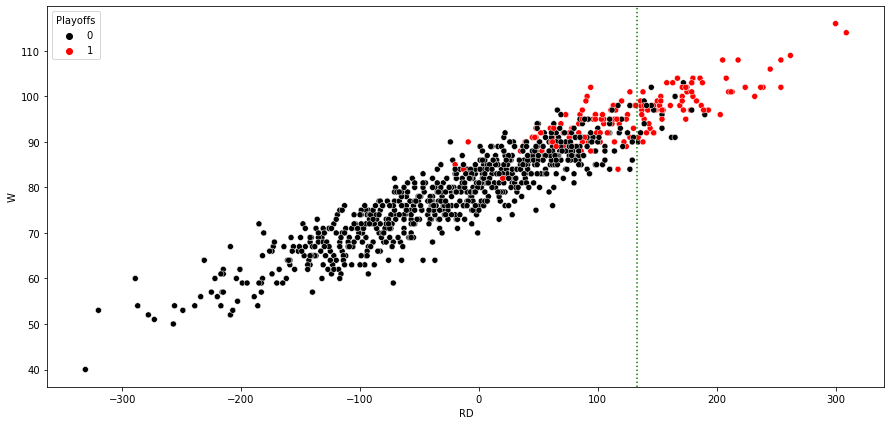

In [ ]:
plt.figure(figsize=(15,7))
RD_plt = sb.scatterplot(x='RD', y='W', hue='Playoffs', palette=['black','red'], data = EDA)
plt.axvline(round(RD(95)), 0, color = 'g', linestyle = ':')
plt.show()

Notice how almost all of the points to the right of the line are red, which means that they made the playoffs. If the line were placed at a few runs lower on the x-axis, there would still be too many black dots to the right of it to be sufficiently certain that the threshold was optimal. If the line were placed at a few runs higher on the x-axis, there would be too many red dots to the left of the line. So, Beane and DePodesta had a number to shoot for in a run differential of around 135 runs throughout the regular season.

Now Paul wanted to find out how they would score that many more runs than their opponent. He found that a team's OPS, or On-Base Plus Slugging Percentage, was a strong indicator of the number of runs they would score. Let's create this new feature and create a model to see this relationship...

In [ ]:
EDA['OPS'] = EDA.apply(lambda row: row.OBP + row.SLG, axis=1)
EDA.head()

<ipython-input-11-d937f7bd1f08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EDA['OPS'] = EDA.apply(lambda row: row.OBP + row.SLG, axis=1)


,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD,OPS
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39,0.732
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141,0.783
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86,0.736
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,-142,0.699
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,27,0.773


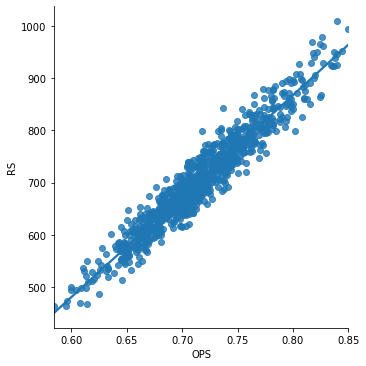

In [ ]:
sb.lmplot(x='OPS', y='RS', data = EDA, ci=None)

In [ ]:
X = np.array(EDA['OPS']).reshape(-1, 1)
y = np.array(EDA['RS']).reshape(-1, 1)

# Splitting the data into training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

reg = LinearRegression() 
RS_model = reg.fit(X_train, y_train)
print("The equation for this linear regression model: Runs Scored =", RS_model.intercept_[0], "+", RS_model.coef_[0][0], "* OPS")
print("The R^2 value of this model", reg.score(X_test, y_test))
pred = RS_model.predict(X_test)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE: % f" %(rmse))

RS = lambda OPS: (RS_model.intercept_[0]) + RS_model.coef_[0][0] * OPS
print("The Runs Scored (RS) for a team with an OPS of 0.771 is approximately", round(RS(0.771)))

The equation for this linear regression model: Runs Scored = -672.6629413893854 + 1924.7484458133772 * OPS
The R^2 value of this model 0.9195375528350642
RMSE:  27.105829
The Runs Scored (RS) for a team with an OPS of 0.771 is approximately 811


With a high $R^2$ value for the linear regression model, we can see that this new feature is a strong indicator of the number of runs a team will score over the course of a single season. With our model, we can predict the run scored within approximately 26 runs on average. Using the OPS of the 2002 Oakland Athletics, we can predict the number of runs they will score closely to the true value of 800 runs.

Paul also found that a team's OOPS, or Opponent's On-Base Plus Slugging Percentage, was a strong indicator of the number of runs they would allow. Let's create this new feature and create a model to see this relationship...

In [ ]:
EDA['OOPS'] = EDA.apply(lambda row: row.OOBP + row.OSLG, axis=1)
EDA.head()

<ipython-input-14-c022a2d12c7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EDA['OOPS'] = EDA.apply(lambda row: row.OOBP + row.OSLG, axis=1)


,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD,OPS,OOPS
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39,0.732,0.743
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141,0.783,0.715
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86,0.736,0.698
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,-142,0.699,0.776
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,27,0.773,0.722


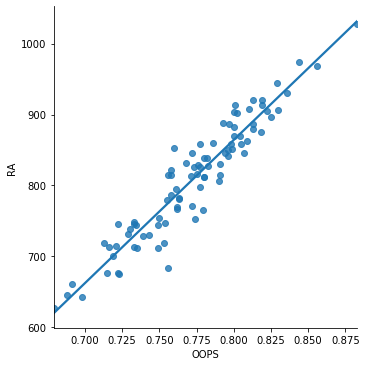

In [ ]:
sb.lmplot(x='OOPS', y='RA', data = EDA, ci=None)

In [ ]:
RA_df = EDA[EDA.Year>1998]

X = np.array(RA_df['OOPS']).reshape(-1, 1)
y = np.array(RA_df['RA']).reshape(-1, 1)

# Splitting the data into training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

reg = LinearRegression() 
RA_model = reg.fit(X_train, y_train)
print("The equation for this linear regression model: Runs Allowed =", RA_model.intercept_[0], "+", RA_model.coef_[0][0], "* OOPS")
print("The R^2 value of this model", reg.score(X_test, y_test))
pred = RA_model.predict(X_test)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE: % f" %(rmse))

RA = lambda OOPS: (RA_model.intercept_[0]) + RA_model.coef_[0][0] * OOPS
print("The Runs Allowed (RA) for a team with an OOPS of 0.688 is approximately", round(RA(0.699)))

The equation for this linear regression model: Runs Allowed = -754.4371622518502 + 2020.8422739197483 * OOPS
The R^2 value of this model 0.8938289867833223
RMSE:  25.304681
The Runs Allowed (RA) for a team with an OOPS of 0.688 is approximately 658


With a high $R^2$ value for the linear regression model, we can see that this new feature is a strong indicator of the number of runs a team will allow over the course of a single season. With our model, we can predict the run allowed within approximately 26 runs on average. Using the OOPS of the 2002 Oakland Athletics, we can predict the number of runs they will allow closely to the true value of 654 runs.

Let's now put use values that we have predicted for runs scored and runs allowed to predict the run differential of the 2002 Oakland Athletics...

In [ ]:
print("The Run Differential (RD) for a team with an OPS of 0.784 and an OOPS of 0.688 is approximately",
      round(RS(0.771)-RA(0.699)))

The Run Differential (RD) for a team with an OPS of 0.784 and an OOPS of 0.688 is approximately 153


This predicted value of the run differential is close to the true value of 146 for the 2002 Oakland Athletics. Now we can use this value to predict the number of wins that the team will win in the 2002 season!

In [ ]:
Wins = lambda RD: (win_model.intercept_[0]) + win_model.coef_[0][0] * RD
print("The number of wins (W) for a team with an RD of", round(RS(0.771)-RA(0.699)),"is approximately",
      round(Wins(round(RS(0.771)-RA(0.699)))))

The number of wins (W) for a team with an RD of 153 is approximately 97


Finally, we have predicted how many wins Billy Beane, Paul DePodesta and the Oakland A's would win in the 2002 season. They won a total 103 games that year, smashing all expectations, even ours! Can we get recreate this prediction with a machine learning model of our own?

Let's begin by recreating these features that we found as strong indicators in our previous models. We will also create and ID column to easily access the team and season that we predicted the win numbers for. Due to lack of data in the OOBP and OSLG columns before 1999, we will not utilize OOPS in this model.

In [ ]:
baseball_df['ID'] = baseball_df.apply(lambda row: row.Team + str(row.Year), axis=1)
baseball_df['RD'] = baseball_df.apply(lambda row: row.RS - row.RA, axis=1)
baseball_df['OPS'] = baseball_df.apply(lambda row: row.OBP + row.SLG, axis=1)
baseball_df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,ID,RD,OPS
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,ARI2012,46,0.746
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,ATL2012,100,0.709
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,BAL2012,7,0.728
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,BOS2012,-72,0.730
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,CHC2012,-146,0.680


In [ ]:
train = baseball_df[baseball_df.Year < 2002]
test = baseball_df[baseball_df.Year > 2001]
train_y1 = train["W"]
test_y1 = test["W"]
ID = test['ID']
train_X1 = train[['RD','OPS']]
test_X1 = test[['RD','OPS']]

xgb_r = xgb.XGBRegressor(objective='reg:squarederror', max_depth=2, learning_rate=0.14, seed=11)
xgb_r.fit(train_X1, train_y1)
pred1 = xgb_r.predict(test_X1).round()

predictions1 = pd.DataFrame(pred1, index = ID, columns=['Predicted Wins:'])
print(predictions1.loc['OAK2002'])
print()

rmse = np.sqrt(MSE(test_y1, pred1))
print("RMSE: % f" %(rmse))

Predicted Wins:    97.0
Name: OAK2002, dtype: float32

RMSE:  4.051188


After using the XGBRegressor method and tuning the hyperparamters of the model before fitting the data, we were again able to predict the number of games that the 2002 Oakland Athletics won. We were able to get just as close to the true number of wins as we did in our previous set of linear regression models. With a RMSE of approximately 4, we can predict the number of wins that a team will win within approximately 4 wins of their true win number on average.

In [ ]:
train_y2 = train["Playoffs"]
test_y2 = test["Playoffs"]
ID = test['ID']
train_X2 = train[['W']]
test_X2 = test[['W']]

xgb_c = xgb.XGBClassifier(objective='binary:logistic', eval_metric='error')
xgb_c.fit(train_X2, train_y2)
pred2 = xgb_c.predict(test_X2)

predictions2 = pd.DataFrame(pred2, index = ID, columns=['Predicted Playoff Trip'])
print(predictions2.loc['OAK2002'])
print()

accuracy = accuracy_score(test_y2, pred2)
print("Accuracy: % f" %(accuracy))

/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Predicted Playoff Trip    1
Name: OAK2002, dtype: int64

Accuracy:  0.893939


After using the XGBClassifier method, we were able to predict that the 2002 Oakland Athletics would make the playoffs. With an accuracy of approximately 0.89, we can predict that a team will make the playoffs correctly approximately 89% of the time.

## Discussion [10 pts]

Discuss the results of your code including 
* Why do you believe that your numerical results are correct (convergence, test cases etc)?
* Did the project work (in your opinion)?
* If yes:  what would be the next steps to try
* If no:  Explain why your approach did not work and what you would do differently next time


I believe that the numerical results are correct throughout this project as I was able to recreate each of the values that Paul Depodesta had set as marks for his team to hit in order to become a playoff bound team. Using both logistic regression and gradient boosted classification methods, I was able to correctly predict that the 2002 Oakland Athletics would make the playoffs in that season. Using linear regression methods, I was able to closely predict the true values for the runs allowed and runs scored of the team, hence the run differential of team as well. As a result of these predictions, I was able to closely predict the number of wins that the 2002 Oakland Athletics would win with both a linear regression and gradient boosted regression methods. Being able to predict within 4 wins of the true number of wins a team would win between the years 2002-2012 and accurately predicted playoff trips 89% of the time, I would say that my project was successful and did work! Although I truly would have liked to get even closer to the true number of wins that the 2002 Oakland Athletics had, I know that there are more reasons behind a team's win number than just their RD and OPS. Maybe if I were able to use the OOPS feature, my gradient boosted model would have performed even better than the linear regression I had shown earlier.

With the success that my project was able to achieve given the limited data that I had worked with, I think that the next logical step in this process would be to gather data on more baseball sabermetrics. There are so many new sabermetric values that could be used to more accurately predict a teams win numbers and playoff trips as well as so many other variables. Acquiring and utilizing the wealth of data that is available in this day and age will greatly push this project and analysis to new lengths. In this project, the emphasis was to use the data that Billy Beane and Paul DePodesta had available to them at the time. Sabermetrics was revolutionized through their efforts, so surely this will help us more accurately predict the values in this project along with many others. Another logical step to take following this project would be to explore more machine learning methods outside of the xgboost package. There are numerous methods out there that are used to predict various things. Exploring new ways to predict this type of data will greatly expand the reaches of this project.